In [79]:
# Import Librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [80]:
# Load Data
HeartDisease = pd.read_csv('Heart_Disease_Prediction.csv')

In [81]:
# Display Dataset
HeartDisease

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [82]:
# Display the first few rows of the dataset
HeartDisease.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [83]:
# Information of Dataset
HeartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [84]:
# Summary statistics using .describe()
HeartDisease.describe(include='all')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Absence
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,NaN
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,NaN
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,NaN
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,NaN


In [85]:
# Checking if missing data or null values are present in the dataset
HeartDisease.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

## 🩺 Heart Disease Label

In [86]:
HeartDisease['Heart_Disease_Status'] = HeartDisease['Heart Disease'].apply(
    lambda x: 'Heart Disease' if x in [1, '1', 'Yes', 'Presence'] else 'No Heart Disease'
)

## 👩‍⚕️ Sex Label

In [87]:
HeartDisease['Sex_Label'] = HeartDisease['Sex'].apply(
    lambda x: 'Male' if x == 1 else 'Female'
)

## 📊 Age Group

In [88]:
bins = [0, 29, 39, 49, 59, 120]
labels = ['Under 30', '30–39', '40–49', '50–59', '60+']

HeartDisease['Age_Group'] = pd.cut(HeartDisease['Age'], bins=bins, labels=labels)

## ❤️ BP Level

In [89]:
HeartDisease['BP_Level'] = HeartDisease['BP'].apply(
    lambda x: 'High BP' if x >= 140 else 'Normal BP'
)

## 🫀 Heart Disease – Visualization Notebook

## 🟠 Pie chart – Heart Disease vs No Heart Disease

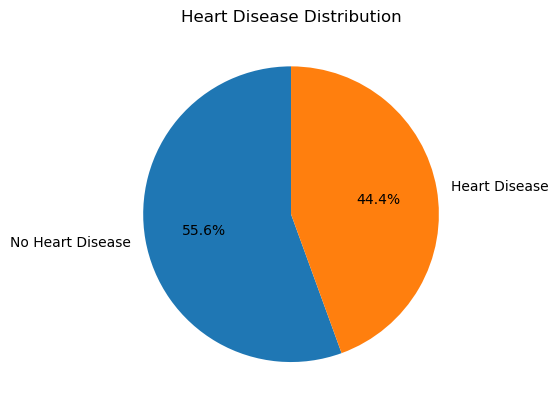

In [90]:
counts = HeartDisease['Heart_Disease_Status'].value_counts()
plt.figure()
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Heart Disease Distribution')
plt.show()


## Donut Chart - Heart Disease Distribution (Donut)

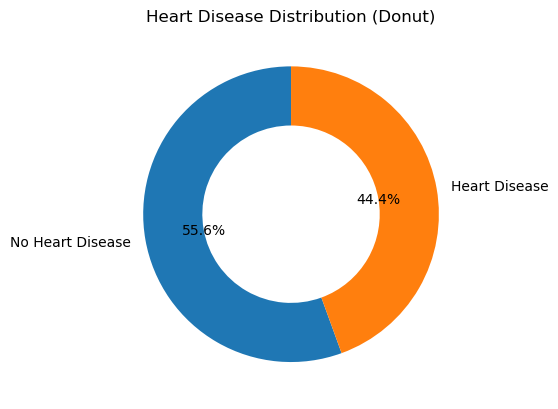

In [91]:
plt.figure()
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.title('Heart Disease Distribution (Donut)')
plt.show()

## Bar Chart - Age Group vs Heart Disease

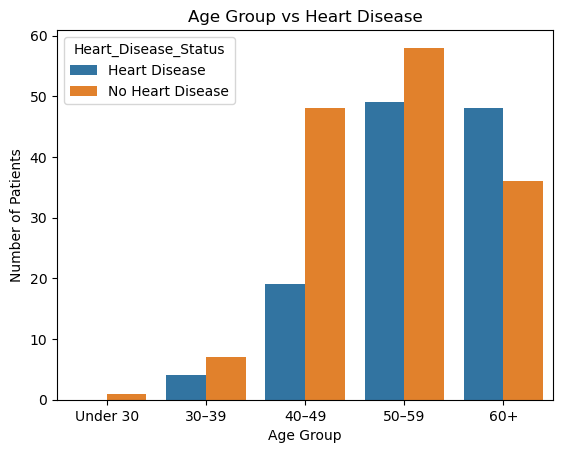

In [92]:
plt.figure()
sns.countplot(
    data=HeartDisease,
    x='Age_Group',
    hue='Heart_Disease_Status'
)
plt.title('Age Group vs Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()

## Histogram - Age Distribution by Heart Disease

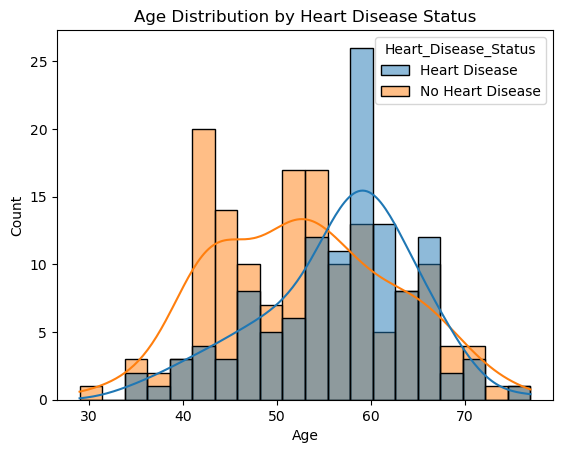

In [93]:
plt.figure()
sns.histplot(
    data=HeartDisease,
    x='Age',
    hue='Heart_Disease_Status',
    bins=20,
    kde=True
)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Card Chart (KPI style)

## 🧮 Calculate KPIs

In [94]:
total_patients = len(HeartDisease)
heart_disease_cases = (HeartDisease['Heart_Disease_Status'] == 'Heart Disease').sum()
rate = heart_disease_cases / total_patients * 100

## 🎴 Display Card

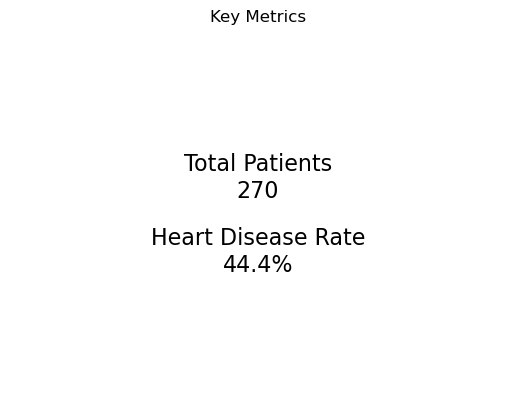

In [95]:
plt.figure()
plt.text(0.5, 0.6, f"Total Patients\n{total_patients}", 
         ha='center', va='center', fontsize=16)

plt.text(0.5, 0.4, f"Heart Disease Rate\n{rate:.1f}%", 
         ha='center', va='center', fontsize=16)

plt.axis('off')
plt.title('Key Metrics')
plt.show()


C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129728 (\N{ANATOMICAL HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


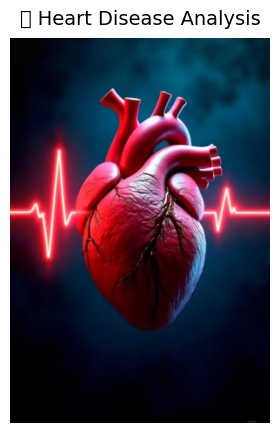

In [96]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("heart disease.jpg")

plt.figure(figsize=(8, 5))
plt.imshow(img)
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.title("🫀 Heart Disease Analysis", fontsize=14, pad=10)
plt.show()

## WordCloud

In [97]:
text = (
    "Age " * len(HeartDisease) +
    "BloodPressure " * HeartDisease['BP_Level'].value_counts().get('High BP', 0) +
    "Cholesterol " * len(HeartDisease) +
    "ChestPain " * len(HeartDisease) +
    "Diabetes " * HeartDisease['FBS over 120'].sum() +
    "ECG " * len(HeartDisease) +
    "ExerciseAngina " * HeartDisease['Exercise angina'].sum() +
    "MaxHeartRate " * len(HeartDisease) +
    "STDepression " * len(HeartDisease) +
    "STSegmentSlope " * len(HeartDisease) +
    "Thallium " * len(HeartDisease) +
    "Vessels " * len(HeartDisease)
)

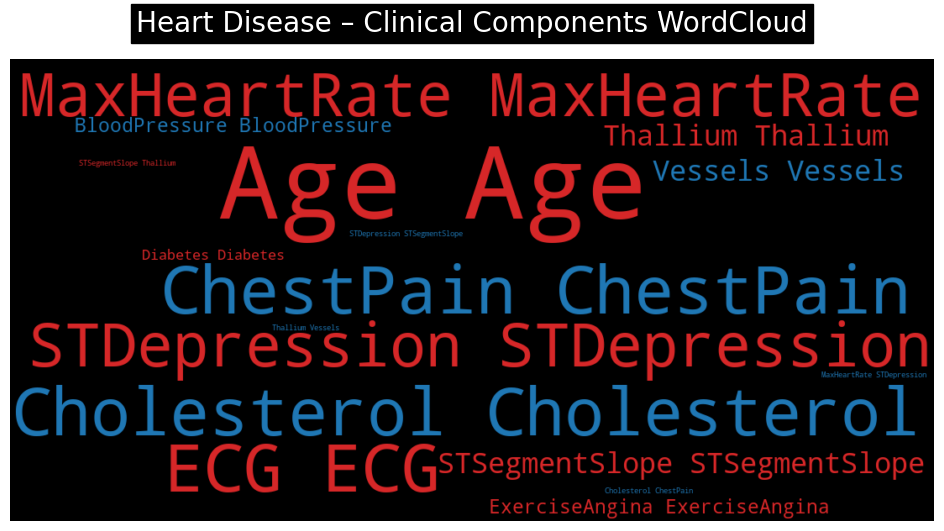

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

def blue_red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#1f77b4", "#d62728"]  # blue / red
    return random.choice(colors)

wordcloud = WordCloud(
    width=1100,
    height=550,
    background_color='black',
    max_words=40,
    prefer_horizontal=0.9,
    color_func=blue_red_color
).generate(text)


plt.figure(figsize=(13, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.title(
    'Heart Disease – Clinical Components WordCloud',
    fontsize=20,
    color='white',
    pad=20,
    backgroundcolor='black'
)

plt.show()

## Code for MySQL

In [99]:
!pip install sqlalchemy pymysql pandas

In [101]:
from sqlalchemy import create_engine
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# MySQL connection
username = "root"
password = quote_plus("Admin@1234")   # encode @, !
host = "localhost"
port = "3306"
database = "HeartDisease"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Write DataFrame to MySQL
table_name = "HearDisea"
HeartDisease.to_sql(
    table_name,
    con=engine,
    if_exists="replace",
    index=False
)

# Read back sample
pd.read_sql("SELECT * FROM HearDisea LIMIT 5;", engine)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3036\351331297.py:16: UserWarning: The provided table name 'HearDisea' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  HeartDisease.to_sql(


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Heart_Disease_Status,Sex_Label,Age_Group,BP_Level
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,Heart Disease,Male,60+,Normal BP
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,No Heart Disease,Female,60+,Normal BP
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,Heart Disease,Male,50–59,Normal BP
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,No Heart Disease,Male,60+,Normal BP
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,No Heart Disease,Female,60+,Normal BP
